In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import psycopg2 as pg
%matplotlib inline

In [2]:
conn = pg.connect(dbname = "postgres", host="db.dssg.io", user='kyang', password = 'postgresis19')

In [3]:
script = "select * from IEFP.applications;"

In [4]:
results_df = pd.read_sql(script, con=conn)

In [5]:
results_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,ddeficiencia,cnacionalidade,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1058797,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,29,None,NaN,None,NaN,NaN,None,0.0,NaN,None
1,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1062047,F,6,6 ANOS,0,NÃO DEFICIENTE,PT,...,46,None,NaN,None,NaN,NaN,None,1.0,NaN,None
2,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1080395,F,6,6 ANOS,21,DEFICIÊNCIAS DA MEMÓRIA,PT,...,31,None,NaN,None,NaN,NaN,None,1.0,NaN,None
3,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1194683,F,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,34,None,NaN,None,NaN,NaN,None,0.0,NaN,None
4,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1199775,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,26,None,NaN,None,NaN,NaN,None,0.0,NaN,None


In [6]:
type(results_df)

pandas.core.frame.DataFrame

In [7]:
# results_df.rename(columns={'anomes':'yearmonth'})

In [8]:
results_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,ddeficiencia,cnacionalidade,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1058797,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,29,None,NaN,None,NaN,NaN,None,0.0,NaN,None
1,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1062047,F,6,6 ANOS,0,NÃO DEFICIENTE,PT,...,46,None,NaN,None,NaN,NaN,None,1.0,NaN,None
2,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1080395,F,6,6 ANOS,21,DEFICIÊNCIAS DA MEMÓRIA,PT,...,31,None,NaN,None,NaN,NaN,None,1.0,NaN,None
3,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1194683,F,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,34,None,NaN,None,NaN,NaN,None,0.0,NaN,None
4,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1199775,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,26,None,NaN,None,NaN,NaN,None,0.0,NaN,None


In [9]:
user_counts = results_df.ute_id.value_counts()
user_counts.head()

2334945    35
5745193    30
2981696    20
3672353    18
2433439    17
Name: ute_id, dtype: int64

In [10]:
user_counts.value_counts().sort_index()

1     36213
2     14833
3      6954
4      3716
5      1800
6       935
7       498
8       264
9       130
10       91
11       37
12       17
13       21
14        3
15        6
17        1
18        1
20        1
30        1
35        1
Name: ute_id, dtype: int64

In [11]:
results_df['user_count'] = results_df['ute_id'].apply(lambda x: user_counts[x])

In [12]:
results_df.groupby(['candidatura_rinsc', 'user_count']).ute_id.agg(['count']) #does not take into account the fact that one user ID could be both

count
candidatura_rinsc user_count       
N                 1           21830
                  2            8424
                  3            3617
                  4            1765
                  5             783
                  6             361
                  7             183
                  8              87
                  9              40
                  10             23
                  11             10
                  12              7
                  13              8
                  14              1
                  15              1
                  30              1
S                 1           14383
                  2           21242
                  3           17245
                  4           13099
                  5            8217
                  6            5249
                  7            3303
                  8            2025
                  9            1130
                  10            887
                  11            397
                  12            197
                  13            265
                  14             41
                  15             89
                  17             17
                  18             18
                  20             20
                  30             29
                  35             35

In [13]:
results_df.columns

Index([u'anomes', u'ctipo_movimento', u'dtipo_movimento', u'ute_id', u'sexo',
       u'chabilitacao_escolar', u'dhabilitacao_escolar', u'cdeficiencia',
       u'ddeficiencia', u'cnacionalidade', u'dnacionalidade',
       u'cnp_pretendida', u'dcnp_pretendida', u'cpp_pretendida',
       u'dcpp_pretendida', u'candidatura_data', u'ccategoria', u'dcategoria',
       u'candidatura_motivo_inscricao', u'candidatura_rinsc',
       u'ute_estado_civil', u'candidatura_int_tempo_nao_insc',
       u'candidatura_prof_pret_tempo_pratica',
       u'sit_anterior_prof_tempo_pratica', u'candidatura_local_trabalho',
       u'ute_plano_emprego', u'ute_plano_emprego_anterior',
       u'candidatura_carteira_prof', u'candidatura_formacao_prof',
       u'candidatura_qualificacao', u'reinscricao_ult_saida_data',
       u'reinscricao_ult_saida_motivo', u'carea_formacao_tabela_em_activo',
       u'darea_formacao_tabela_em_activo', u'carea_curso_tabela_em_activo',
       u'darea_curso_tabela_em_activo', u'colocacao

(array([  8.31070000e+04,   1.63680000e+04,   7.09300000e+03,
          3.31800000e+03,   1.47300000e+03,   2.12000000e+02,
          1.70000000e+01,   1.00000000e+01,   0.00000000e+00,
          3.00000000e+00]),
 array([   0. ,   98.9,  197.8,  296.7,  395.6,  494.5,  593.4,  692.3,
         791.2,  890.1,  989. ]),
 <a list of 10 Patch objects>)

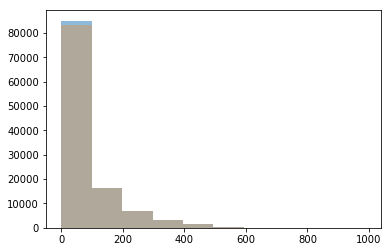

In [14]:
plt.hist(results_df['candidatura_prof_pret_tempo_pratica'].dropna(), bins=10, alpha=0.5)
plt.hist(results_df['sit_anterior_prof_tempo_pratica'].dropna(), bins=10,alpha=0.3)

In [15]:
#plt.hist(results_df['candidatura_local_trabalho'].dropna())
#from collections import Counter
#results_df['candidatura_local_trabalho'].plot()

In [16]:
# local_trabalho_counts = DataFrame.from_dict(Counter(results_df['candidatura_local_trabalho']), orient='index')                                

In [17]:
# local_trabalho_counts.plot(kind='bar')

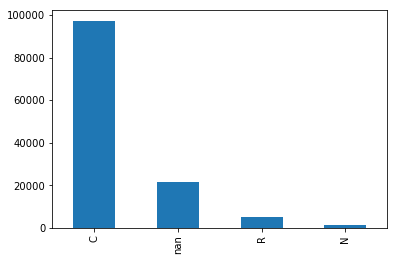

In [18]:
results_df.candidatura_local_trabalho.value_counts(dropna=False).plot(kind='bar')

In [41]:
def print_histograms (df):
    for x in df.columns:
        plt.figure()
        getattr(df,x).value_counts(dropna=False).plot(kind='bar', title=x)

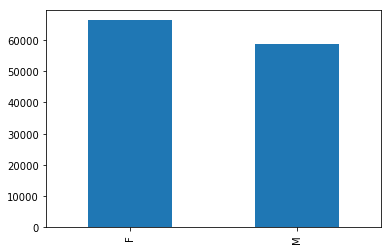

In [28]:
getattr(results_df,results_df.columns[4]).value_counts(dropna=False).plot(kind='bar')

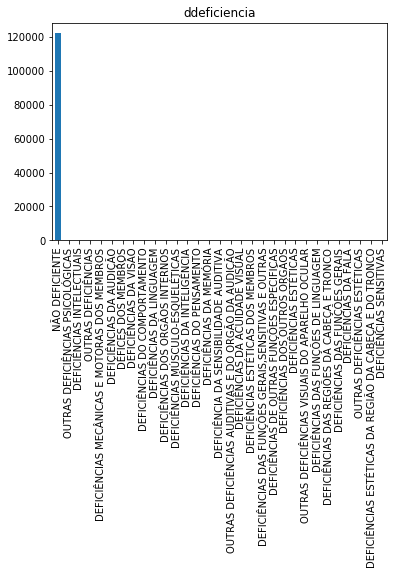

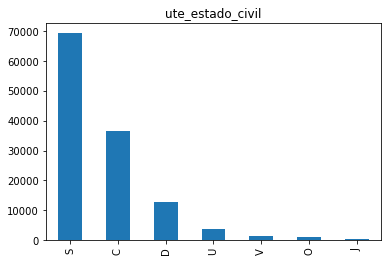

In [42]:
print_histograms(results_df[['ddeficiencia','ute_estado_civil']])

KeyboardInterrupt: 

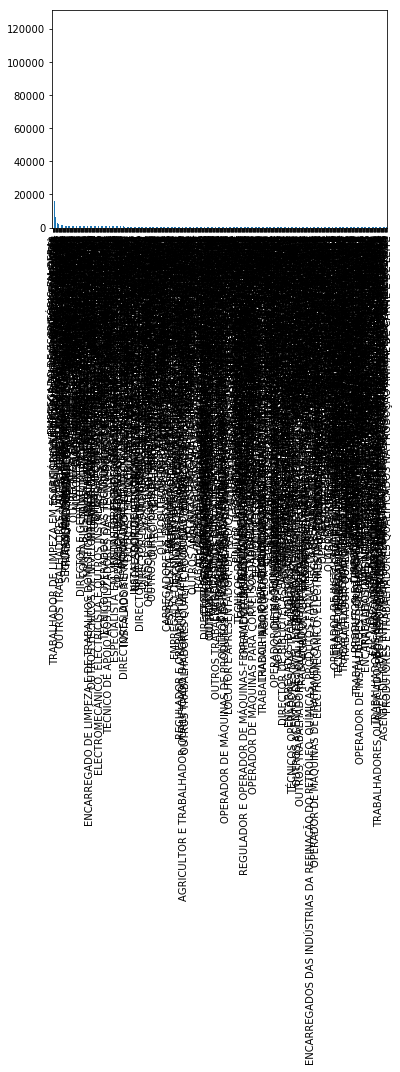

In [24]:
#print_histograms(results_df.drop('ute_id', axis=1))

In [ ]:
print_histograms(results_df[['anomes','candidatura_rinsc']])